In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
custom = {"axes.edgecolor": "black", "grid.linestyle": "dashed", "grid.color": "gray"}
sns.set_style("darkgrid", rc = custom)

### $\text{Let`s make a sythetic dataset to show, how this algorithm works}$

In [6]:
np.random.seed = 42

x_ideal = np.linspace(0, 100, 500)
y_ideal = x_ideal

x_noise = np.random.normal(loc=0,
                           scale=4,
                           size=x_ideal.shape)
y_noise = np.random.normal(loc=0,
                           scale=4,
                           size=y_ideal.shape)

X = x_ideal + x_noise
y = y_ideal + y_noise

data = pd.DataFrame({'feature_1': X, 'target': y})
data

,feature_1,target
0,2.810185,5.183375
1,-1.437242,1.409786
2,7.047881,1.579139
3,6.070525,7.506555
4,0.189520,-1.578793
...,...,...
495,91.150719,98.987109
496,101.510892,107.799202
497,93.602811,103.420090
498,103.584671,96.213624


In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['feature_1'], data['target'], test_size=0.2, random_state=42)

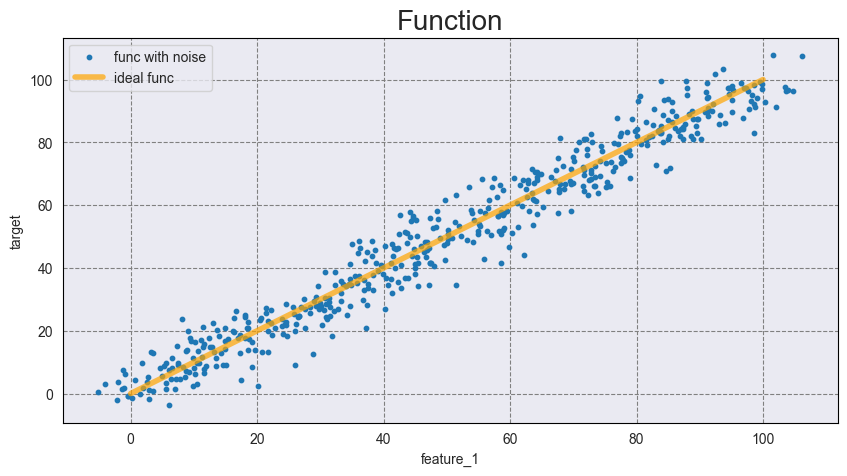

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(data['feature_1'], 
            data['target'], 
            s=10, 
            label='func with noise')
plt.plot(x_ideal, 
         y_ideal, 
         alpha=0.7, 
         color='orange', 
         label='ideal func',
         linewidth=4)
plt.xlabel('feature_1')
plt.ylabel('target')
plt.legend()
plt.title('Function', fontsize=20)
plt.show()

### $\text{I will use Stochastic Gradient Descent in my architecture}$

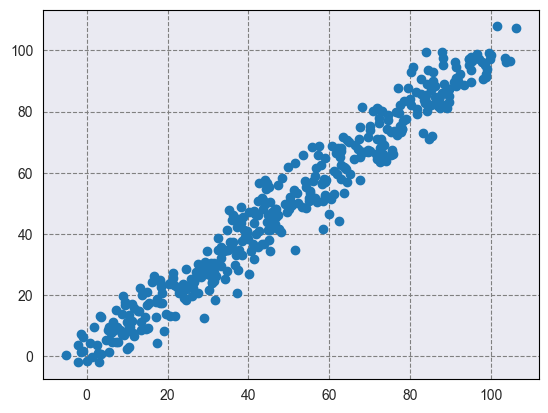

In [ ]:
plt.scatter(X_train, y_train)

### $\text{Model structure}$

### $\text{Formulas, that I will use:}$
### $$\nabla_w L(f_w, X, y) = \frac{2X^T(Xw-y)}{\text{batch size}} + 2\lambda w$$
### $$\frac{2\sum_{i=1}^{N}(y_i-y^\wedge)}{\text{batch size}}$$

In [33]:
class LinearRegression():
    def __init__(self, lr=0.00001, batch_size=50, n_iter=2000, reg_lambda=0.001):
        self.lr = lr
        self.batch_size = batch_size
        self.n_iter = n_iter
        self.reg_lambda = reg_lambda

        self.w = None
        self.b = None

    def fit(self, X, y):
        _, n_columns = X.shape
        self.w = np.random.randn(n_columns)
        self.b = 0
        for j in range(self.n_iter):
            for i in range(self.batch_size, len(X), self.batch_size):
                X_batch = X[i-self.batch_size:i]
                y_batch = y[i-self.batch_size:i]

                pred = self.predict(X_batch)
                err = pred - y_batch
                # d_w = 2 * np.dot(np.transpose(X_batch), err) / self.batch_size
                # d_b = 2 * np.sum(pred - y_batch) / self.batch_size

                # self.w -= self.lr * (d_w + 2 * self.reg_lambda * self.w)
                # self.b -= self.lr * d_b
                dw = 2 * np.dot(np.transpose(X_batch), err) / self.batch_size + 2 * self.reg_lambda * self.w
                db = 2 * np.sum(err) / self.batch_size
                self.w -= self.lr * dw
                self.b -= self.lr * db
                
    def predict(self, X):
        return (np.dot(X, self.w) + self.b)

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(np.array(X_train).reshape(-1, 1), y_train)

In [35]:
preds = lin_reg.predict(np.array(X_test).reshape(-1, 1))

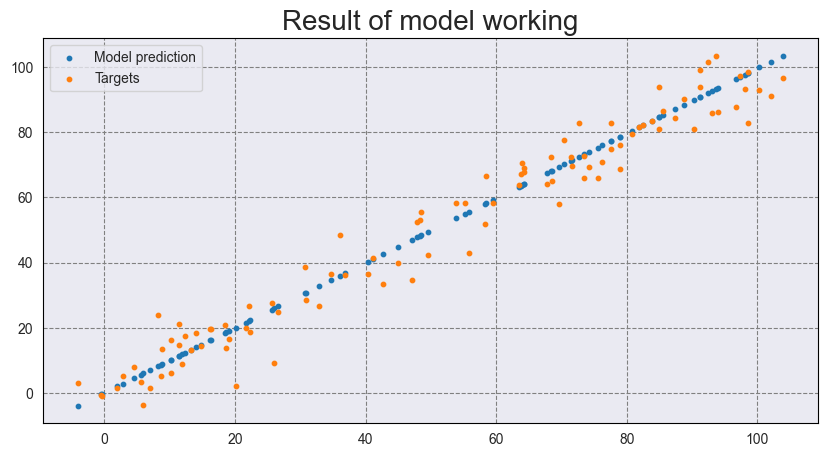

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, preds, s=10, label='Model prediction')
plt.scatter(X_test, y_test, s=10, label='Targets')
plt.title('Result of model working', fontsize=20)
plt.legend()
plt.show()

In [37]:
print(f'MSE = {mean_squared_error(y_test, preds)}')

MSE = 42.464205365515845
